In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
# sum of squares for error
def SSE(y, t):
    return (np.sum((y-t)**2))/2

In [104]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print(SSE(y, t))

y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
print(SSE(y, t))

0.09750000000000003
0.5975


In [110]:
# Cross entropy error
def CEE(y, t):
    return -(np.sum(t*np.log(y+1e-8)))

In [106]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print(CEE(y, t))

y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
print(CEE(y, t))

0.5108256070993241
2.3025849929940505


In [107]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [108]:
y = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

t = np.array([2, 4, 7, 0])

t.reshape(1, -1)

array([[2, 4, 7, 0]])

In [109]:
def CEE(y, t):
    if y.ndim == 1:
        y = y.reshape(1, -1)
        t = t.reshape(1)
    
    if t.ndim == 1:
        return -np.sum(np.log(y[np.arange(len(t)), t] + 1e-7)) / len(t)
    else:
        return -np.sum(t * np.log(y + 1e-7)) / y.shape[0]

In [30]:
y = np.array([[3, 0, 2, 1, 1], [2, 8, 6, 4, 3]])
t = np.array([[3, 8, 2, 1, 7], [2, 8, 6, 4, 5]])

batch_size = y.shape[0]
print(batch_size)
y[np.arange(batch_size), t]

2


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (2,5) 

In [50]:
# 수치 미분(단일)
def numerical_diff(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    tmp_val = x
    fxh1 = f(tmp_val + h)
    fxh2 = f(tmp_val - h)
    
    grad = (fxh1 - fxh2) / (2*h)
        
    return grad

0.1999999999990898
0.2999999999986347


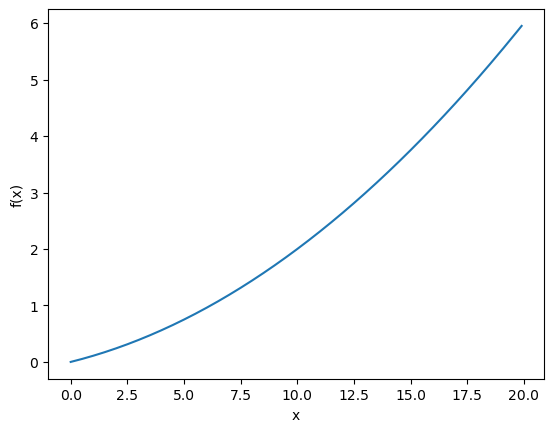

In [51]:
# y = 0.01x² + 0.1x
def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 간격 0.1인 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
# plt.show()

# x = 5, 10일때 미분
print(numerical_diff(function_1, 5))   # 0.200000000000089
print(numerical_diff(function_1, 10))  # 0.29999999999996696

In [64]:
def numerical_gradient(f, x):
    h = 1e-8
    grad = np.zeros_like(x)
    
    for i in range(len(x)):
        tmp_val = x[i]
        
        x[i] = tmp_val + h
        fxh1 = f(x)
        
        x[i] = tmp_val - h
        fxh2 = f(x)
        
        grad[i] = (fxh1 - fxh2) / (2*h)
        
        x[i] = tmp_val
        
    return grad

In [66]:
def gradient_descent(f, init_x, lr, step_num):
    x = init_x
    
    for _ in range(step_num):
        grad = numerical_gradient(f, x)
        x = x - lr*grad
        
    return x

In [67]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110797e-10,  8.14814402e-10])

In [69]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[3.86679657e+09 1.77584273e+08]
[-2.99999994  3.99999992]


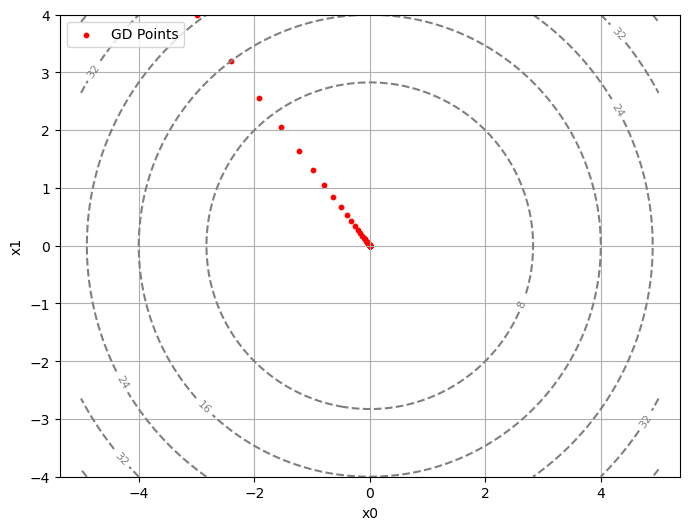

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
def function_2(x):
    return x[0]**2 + x[1]**2

# 수치 미분
def numerical_gradient(f, x):
    h = 1e-8
    grad = np.zeros_like(x)
    for i in range(len(x)):
        tmp_val = x[i]
        x[i] = tmp_val + h
        fxh1 = f(x)
        x[i] = tmp_val - h
        fxh2 = f(x)
        grad[i] = (fxh1 - fxh2) / (2 * h)
        x[i] = tmp_val
    return grad

# 경사 하강법
def gradient_descent(f, init_x, lr, step_num):
    x = init_x
    x_history = []
    for _ in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

# 하이퍼파라미터
init_x = np.array([-3.0, 4.0])
lr = 0.1
step_num = 100

# 실행
final_x, x_history = gradient_descent(function_2, init_x, lr, step_num)

# 등고선용 meshgrid
x0 = np.linspace(-5.0, 5.0, 100)
x1 = np.linspace(-4.0, 4.0, 100)
X, Y = np.meshgrid(x0, x1)
Z = X**2 + Y**2

# 시각화
plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=5, colors='gray', linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=8)

# 점만 표시 (선 없이)
plt.scatter(x_history[:, 0], x_history[:, 1], color='red', s=10, label='GD Points')

plt.xlabel('x0')
plt.ylabel('x1')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


In [96]:
from util import softmax

class simpleNet:
    def __init__(self):
        # 2 layer, intput: 3, output:2
        self.network = {}
        self.network["W1"] = np.random.randn(2,3)
        
    def forward(self, x):
        z = np.dot(x, self.network["W1"])
        y = softmax(z)
        
        return y
        
    def loss(self, x, t):
        y = softmax(self.forward(x))
        return CEE(y, t)

In [97]:
net = simpleNet()
net.network

{'W1': array([[ 0.81670155, -0.51340783,  1.95950041],
        [-0.74510343, -0.78106204,  0.56591509]])}

In [111]:
x = np.array([0.6, 0.9])
p = net.forward(x)
p

array([0.12665206, 0.05520289, 0.81814505])

In [112]:
np.argmax(p)

2

In [ ]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.6765706669521998

In [115]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
        c = np.max(x)
        exp_x = np.exp(x - c)
        sum_exp_x = np.sum(exp_x)
        y = exp_x / sum_exp_x
        
        return y
    
def CEE(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

class simpleNet:
    def __init__(self):
        # 2 layer, intput: 3, output:2
        self.network = {}
        self.network["W1"] = np.random.randn(2,3)
        
    def forward(self, x):
        z = np.dot(x, self.network["W1"])
        y = softmax(z)
        
        return y
        
    def loss(self, x, t):
        y = softmax(self.forward(x))
        return CEE(y, t)

In [116]:
net = simpleNet()
net.network

{'W1': array([[-0.20212546,  0.84112467,  0.45072884],
        [ 1.11825225, -2.37790032,  0.40052831]])}

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
        c = np.max(x)
        exp_x = np.exp(x - c)
        sum_exp_x = np.sum(exp_x)
        y = exp_x / sum_exp_x
        
        return y
    
def CEE(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

# 다차원 배열 gradient 처리
def numerical_gradient(f, x):
    h = 0.0001

    shape = x.shape
    x_flatten = x.reshape(-1)
    size = len(x_flatten)

    grad = np.zeros_like(x_flatten)

    for i in range(size):
        x_val = x_flatten[i]

        x_flatten[i] = x_val + h
        fxh1 = f(x_flatten.reshape(shape))

        x_flatten[i] = x_val - h
        fxh2 = f(x_flatten.reshape(shape))

        grad[i] = (fxh1 - fxh2) / (2*h)

        x_flatten[i] = x_val
        
    return grad.reshape(shape)

class simpleNet:
    def __init__(self):
        # 2 layer, intput: 3, output:2
        self.network = {}
        self.network["W1"] = np.random.randn(2,3)
        
    def forward(self, x):
        z = np.dot(x, self.network["W1"])
        y = softmax(z)
        
        return y
        
    def loss(self, x, t):
        y = self.forward(x)
        return CEE(y, t)

In [126]:
net = simpleNet()
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

def loss_func(W):
    net.network["W1"] = W
    return net.loss(x, t)

gradient(loss_func, net.network["W1"])

array([[ 0.0338636 ,  0.15861355, -0.19247715],
       [ 0.05079541,  0.23792032, -0.28871573]])

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
        c = np.max(x)
        exp_x = np.exp(x - c)
        sum_exp_x = np.sum(exp_x)
        y = exp_x / sum_exp_x
        
        return y

# 배치용 CEE
def CEE(y, t):
    if y.ndim == 1:
        y = y.reshape(1, -1)
        t = t.reshape(1)
    
    if t.ndim == 1:
        return -np.sum(np.log(y[np.arange(len(t)), t] + 1e-7)) / len(t)
    else:
        return -np.sum(t * np.log(y + 1e-7)) / y.shape[0]

In [73]:
def numerical_gradient(f, params):
    h = 0.0001

    shape = params.shape
    params_flatten = params.reshape(-1)
    size = len(params_flatten)

    grad = np.zeros_like(params_flatten)

    for i in range(size):
        param_val = params_flatten[i]

        params_flatten[i] = param_val + h
        fxh1 = f(params_flatten.reshape(shape))

        params_flatten[i] = param_val - h
        fxh2 = f(params_flatten.reshape(shape))

        grad[i] = (fxh1 - fxh2) / (2*h)

        params_flatten[i] = param_val
        
    return grad.reshape(shape)

In [134]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        # 2 layer, intput: 3, output:2
        self.params = {}
        # layer 1
        self.params["W1"] = np.random.randn(input_size,hidden_size)
        self.params["B1"] = np.random.randn(hidden_size)
        #layer 2
        self.params["W2"] = np.random.randn(hidden_size,output_size)
        self.params["B2"] = np.random.randn(output_size)
        
        self.grads = {}
        
    def predict(self, x):
        z = sigmoid(np.dot(x, self.params["W1"]) + self.params["B1"])
        y = softmax(np.dot(z, self.params["W2"]) + self.params["B2"])
        return y
        
    def loss(self, x, t):
        y = self.predict(x)
        
        return CEE(y, t)
    
    def accuracy(self, Y, t):
        predict_label = np.argmax(Y, axis=1)
        
        return np.sum(predict_label == t) / len(predict_label)
    
    def gradient(self, x, t):
        for key in self.params.keys():
            def loss_func(param):
                return self.loss(x, t)

            self.grads[key] = numerical_gradient(loss_func, self.params[key])
    
        return self.grads
        

In [132]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params["W1"].shape, net.params["B1"].shape, net.params["W2"].shape, net.params["B2"].shape

((784, 100), (100,), (100, 10), (10,))

In [ ]:
x = np.random.randn(100, 784)
t = np.random.randint(0, 10, size=(100,))

grads = net.gradient(x, t)

In [ ]:
grads["W1"].shape, grads["B1"].shape, grads["W2"].shape, grads["B2"].shape

((784, 100), (100,), (100, 10), (10,))

In [ ]:
x_train.shape, t_train.shape

((60000, 784), (60000, 10))

In [137]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

In [142]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

def shuffle_data(x, t):
    x_dim = x.shape[1]
    xt_concat = np.concatenate([x, t], axis=1)
    
    np.random.shuffle(xt_concat)
    
    x_shuffled = xt_concat[:, :x_dim]
    t_shuffled = xt_concat[:, x_dim:]
    
    return x_shuffled, t_shuffled

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

offset = 0
for i in range(iters_num):
    print(f" ======= {i+1}/{iters_num} =======")
    x_train_shuffled, t_train_shuffled = shuffle_data(x_train, t_train)
    
    x_batch = x_train_shuffled[offset:offset+batch_size]
    t_batch = t_train_shuffled[offset:offset+batch_size]
    
    grads = network.gradient(x_batch, t_batch)
    loss = network.loss(x_batch, t_batch)
    print(f"loss : {loss}")
    for key in network.params.keys():
        network.params[key] -= lr*grads[key]
        
    train_loss_list.append(loss)

 ======= 1/10000 =======
loss : 14.811386555403928
 ======= 2/10000 =======
loss : 14.408392734322273
 ======= 3/10000 =======
loss : 13.955339714979116
 ======= 4/10000 =======
loss : 13.33051347508331
 ======= 5/10000 =======
loss : 12.826477497565794
 ======= 6/10000 =======
loss : 12.613144153682176
 ======= 7/10000 =======
loss : 12.662980996727974
 ======= 8/10000 =======
loss : 11.64103634182843
 ======= 9/10000 =======
loss : 11.986257396411606
 ======= 10/10000 =======


KeyboardInterrupt: 

In [ ]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

((784, 50), (784, 100))

In [ ]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        
        return self.x * self.y

    def backward(self, dz):
        grads = {}
        grads["x"] = dz * self.y
        grads["y"] = dz * self.x
        
        return grads
        

class AddLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        
        return self.x + self.y

    def backward(self, dz):
        grads = {}
        grads["x"] = dz
        grads["y"] = dz
        
        return grads

In [ ]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(mul_apple_layer.x, mul_apple_layer.y)
print(mul_tax_layer.x, mul_tax_layer.y)
print(apple_price, price)

100 2
200 1.1
200 220.00000000000003


In [ ]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice).values()
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price).values()
dapple, dapple_num = mul_apple_layer.backward(dapple_price).values()
dorange, dorange_num = mul_orange_layer.backward(dorange_price).values()

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)


715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


In [ ]:
class ReLU:
    def __init__(self):
        self.x = None
        
    def forward(self, x):
        self.x = x
        return (x > 0)*x
    
    def backward(self, dz):
        return (dz > 0).astype(int)
    

In [ ]:
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
x.T

array([[ 1. , -2. ],
       [-0.5,  3. ]])

In [ ]:
mask = (x<=0)
mask

array([[False,  True],
       [ True, False]])

In [ ]:
class Sigmoid:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x):
        self.x = x
        self.y = 1 / (1 + np.exp(-self.x))
        return self.y
    
    def backward(self, dz):
        return dz * self.y *(1 - self.y)

In [ ]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.X = None
    def forward(self, X):
        self.X = X        
        return np.dot(X, self.W) + self.b
    
    def backward(self, dz):
        grads = {}
        grads["W"] = np.dot(self.X.T, dz)
        grads["X"] = np.dot(dz, self.W.T)
        grads["b"] = np.sum(dz, axis=0)
        
        return grads

In [ ]:
class Softmax_with_Loss:
    def __init__(self):
        self.y = None
        self.t = None
        
    def forward(self, X, t):
        self.y = softmax(X)
        self.t = t
        loss = CEE(self.y, self.t)
        
        return loss
    
    def backward(self):
        return (self.y - self.t)/self.t.shape[0]

In [ ]:
l = Softmax_with_Loss()

X = np.array([[0.3, 0.2, 0.5], [0.01, 0.99, 0.0]])
t = np.array([[0, 1, 0], [0, 1, 0]])
l.forward(X, t)
softmax(X), l.backward()


(array([[0.15130796, 0.13690911, 0.18480796],
        [0.11321824, 0.30166504, 0.1120917 ]]),
 array([[ 0.15130796, -0.86309089,  0.18480796],
        [ 0.11321824, -0.69833496,  0.1120917 ]]))

In [ ]:
import numpy as np
from collections import OrderedDict

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#def softmax(x):
#        c = np.max(x)
#        exp_x = np.exp(x - c)
#        sum_exp_x = np.sum(exp_x)
#        y = exp_x / sum_exp_x
#        
#        return y
 
def softmax(x):
    if x.ndim == 2:
        c = np.max(x, axis=1, keepdims=True)
        exp_x = np.exp(x - c)
        sum_exp_x = np.sum(exp_x, axis=1, keepdims=True)
        return exp_x / sum_exp_x
    else:
        c = np.max(x)
        exp_x = np.exp(x - c)
        return exp_x / np.sum(exp_x)
       
def CEE(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

def gradient(f, x):
    h = 0.0001

    shape = x.shape
    x_flatten = x.reshape(-1)
    size = len(x_flatten)

    grad = np.zeros_like(x_flatten)

    for i in range(size):
        x_val = x_flatten[i]

        x_flatten[i] = x_val + h
        fxh1 = f(x_flatten.reshape(shape))

        x_flatten[i] = x_val - h
        fxh2 = f(x_flatten.reshape(shape))

        grad[i] = (fxh1 - fxh2) / (2*h)

        x_flatten[i] = x_val
        
    return grad.reshape(shape)

class ReLU:
    def __init__(self):
        self.x = None
        
    def forward(self, x):
        self.x = x
        return (x > 0)*x
    
    def backward(self, dz):
        return dz*(self.x > 0).astype(int)
    
class Sigmoid:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x):
        self.x = x
        self.y = 1 / (1 + np.exp(-self.x))
        return self.y
    
    def backward(self, dz):
        return dz * self.y *(1 - self.y)
    
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.X = None 
        
    def forward(self, X):
        self.X = X        
        return np.dot(X, self.W) + self.b
    
    def backward(self, dz):
        grads = {}
        grads["W"] = np.dot(self.X.T, dz)
        grads["X"] = np.dot(dz, self.W.T)
        grads["b"] = np.sum(dz, axis=0)
        
        return grads

class Softmax_with_Loss:
    def __init__(self):
        self.y = None
        self.t = None
        
    def forward(self, X, t):
        self.y = softmax(X)
        self.t = t
        loss = CEE(self.y, self.t)
        
        return loss
    
    def backward(self):
        batch_size = self.t.shape[0]
        return (self.y - self.t) / batch_size
    
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.params = {}
        # layer 1
        self.params["W1"] = 0.01 * np.random.randn(input_size,hidden_size)
        self.params["B1"] = 0.01 * np.random.randn(hidden_size)
        #layer 2
        self.params["W2"] = 0.01 * np.random.randn(hidden_size,output_size)
        self.params["B2"] = 0.01 * np.random.randn(output_size)
        
        self.layer = OrderedDict()
        self.layer["Affine1"] = Affine(self.params["W1"], self.params["B1"])
        self.layer["ReLU1"] = ReLU()
        self.layer["Affine2"] = Affine(self.params["W2"], self.params["B2"])
        
        self.last_layer = Softmax_with_Loss()
        
    def predict(self, X):
        h = self.layer["Affine1"].forward(X)
        h = self.layer["ReLU1"].forward(h)
        y = self.layer["Affine2"].forward(h)
        
        return y
        
    def loss(self, x, t):
        y = self.predict(x)
        loss = self.last_layer.forward(y, t)
        return loss
    
    def accuracy(self, x, t):
        Y = self.predict(x)
        predict_label = np.argmax(Y, axis=1)
        target_label = np.argmax(t, axis=1)
        return np.sum(predict_label == target_label) / len(predict_label)
    
    def numerical_gradient(self, x, t):
        grads = {}

        for key in self.params:
            original_param = self.params[key]

            def loss_func(param):
                self.params[key][...] = param
                y = self.predict(x)
                return self.last_layer.forward(y, t)

            h = 1e-4
            shape = original_param.shape
            param_flat = original_param.reshape(-1)
            grad = np.zeros_like(param_flat)

            for i in range(len(param_flat)):
                tmp_val = param_flat[i]

                param_flat[i] = tmp_val + h
                fxh1 = loss_func(param_flat.reshape(shape))

                param_flat[i] = tmp_val - h
                fxh2 = loss_func(param_flat.reshape(shape))

                grad[i] = (fxh1 - fxh2) / (2 * h)

                param_flat[i] = tmp_val

            grads[key] = grad.reshape(shape)
            #self.params[key] = original_param
        return grads
    
    def gradient(self, x, t):
        loss = self.loss(x, t)
        grads = {}
        
        dout = self.last_layer.backward()
        temp_grads = self.layer["Affine2"].backward(dout)
        grads["W2"] = temp_grads["W"]
        grads["B2"] = temp_grads["b"]
        dout = temp_grads["X"]
        
        dout = self.layer["ReLU1"].backward(dout)
        
        temp_grads = self.layer["Affine1"].backward(dout)
        grads["W1"] = temp_grads["W"]
        grads["B1"] = temp_grads["b"]
        
        return grads

In [ ]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" + str(diff))

W1:4.2370386485336347e-10
B1:2.4638643547451877e-09
W2:5.852659927378508e-09
B2:1.417520355082025e-07


weight 초기화 문제